# Throughput

In [1]:
import csv
def parse(filename):
  azure_runs = {}
  netherite_runs = {}
  with open(filename, 'r') as fin:
    csv_reader = csv.reader(fin, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
          if row[2] == "azst-12":
            conf = row[0]+"-"+row[1]
            if conf not in azure_runs:
              azure_runs[conf] = []
            throughput = float(row[7])/float(row[8])
            #print(row[2], conf, throughput)
            azure_runs[conf].append(throughput)
          
          if row[2] == "neth":
            conf = row[0]+"-"+row[1]
            if conf not in netherite_runs:
              netherite_runs[conf] = []
            throughput = float(row[7])/float(row[8])
            #print(row[2], conf, throughput)
            netherite_runs[conf].append(throughput)
          
        line_count += 1
    print("parsed a total of", line_count, "lines, found", len(azure_runs), "azure runs and", len(netherite_runs), "netherite runs")
    return { "azure": azure_runs, "netherite": netherite_runs }

In [2]:
runs = parse('hello.csv')

hello_azure_runs = [i for i in runs["azure"].values()]
hello_netherite_runs = [i for i in runs["netherite"].values()]

parsed a total of 143 lines, found 12 azure runs and 12 netherite runs


In [3]:
runs = parse('bank.csv') 
 
bank_azure_runs = [i for i in runs["azure"].values()]
bank_netherite_runs = [i for i in runs["netherite"].values()]

parsed a total of 145 lines, found 12 azure runs and 12 netherite runs


In [4]:
runs = parse('collision.csv') 
 
collision_azure_runs = [i for i in runs["azure"].values()]
collision_netherite_runs = [i for i in runs["netherite"].values()]

parsed a total of 145 lines, found 12 azure runs and 12 netherite runs


In [5]:
runs = parse('wordcount.csv') 
 
wordcount_azure_runs = [i for i in runs["azure"].values()]
wordcount_netherite_runs = [i for i in runs["netherite"].values()]

parsed a total of 145 lines, found 12 azure runs and 12 netherite runs


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

# plt.rcParams['mathtext.fontset'] = 'stix'
# plt.rcParams['font.family'] = 'STIXGeneral'
plt.figure(dpi=1200)

def plot_figure(ax, azure_runs, netherite_runs, experiment_name, N=12, ylabel=True, legend=True):
    
  norm_factor = np.mean(azure_runs[0])
  netherite_means = [np.mean(i)/norm_factor for i in netherite_runs]
  # netherite_stds = [np.std(i) for i in netherite_runs]


  azure_means = [np.mean(i)/norm_factor for i in azure_runs]
  # azure_stds = [np.std(i) for i in azure_runs]

  ind = np.arange(N)  # the x locations for the groups
  width = 0.45       # the width of the bars

  # fig, ax = plt.subplots(figsize=(7,2))
  rects1 = ax.bar(ind, azure_means, width, color=(1.0, 0.589256862745098, 0.0130736618971914))

  rects2 = ax.bar(ind + width, netherite_means, width, color='#1874CD')

  # add some text for labels, title and axes ticks
  if ylabel:
    ax.set_ylabel('Normalized Throughput')
  ax.set_xticks(ind + width / 2)
  ax.set_xticklabels(('1x1', '4x1', '8x1', '12x1', '1x2', '4x2', '8x2', '12x2', '1x4', '4x4', '8x4', '12x4'))

  if legend:
    ax.legend((rects1[0], rects2[0]), ('Original', 'Netherite'))
  ax.set_title(experiment_name)

  # ax.gcf().text(0.5, 0.95, experiment_name, transform=ax.transAxes, fontsize=14,
  #       verticalalignment='top', horizontalalignment='center')

  def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.1f' % height,
                ha='center', va='bottom',fontsize = 8)

  autolabel(rects1)
  autolabel(rects2)

  # plt.show()


<Figure size 7200x4800 with 0 Axes>

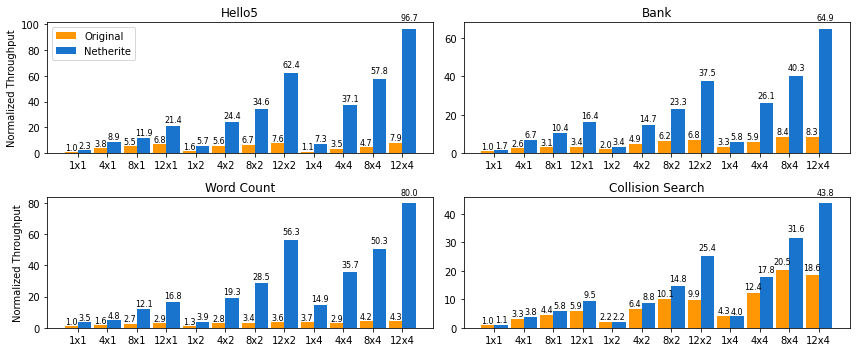

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,5), sharex=False)
fig.subplots_adjust(hspace=0.4)
plot_figure(ax1, hello_azure_runs, hello_netherite_runs, "Hello5") 
plot_figure(ax2, bank_azure_runs, bank_netherite_runs, "Bank", ylabel=False, legend=False)     
plot_figure(ax3, wordcount_azure_runs, wordcount_netherite_runs, "Word Count", legend=False) 
plot_figure(ax4, collision_azure_runs, collision_netherite_runs, "Collision Search", ylabel=False, legend=False) 
plt.tight_layout()
plt.savefig("throughput-new.pdf", format="pdf", dpi=300)
plt.show()

# Storage Traffic

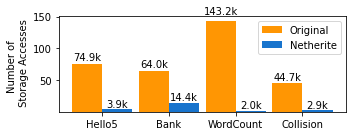

In [8]:
import numpy as np
def plot_figure_storage(azure_runs, netherite_runs, ylabel, N=4):
    
  ind = np.arange(4)  # the x locations for the groups
  width = 0.45       # the width of the bars

  fig, ax = plt.subplots(figsize=(5,2))
  rects1 = ax.bar(ind, azure_runs, width, color=(1.0, 0.589256862745098, 0.0130736618971914))

  rects2 = ax.bar(ind + width, netherite_runs, width, color='#1874CD')

  # add some text for labels, title and axes ticks
  ax.set_ylabel(ylabel)
  ax.set_xticks(ind + width / 2)
  ax.set_xticklabels(('Hello5', 'Bank', 'WordCount', 'Collision'))
  ax.set_yticks([50, 100, 150])

  ax.legend((rects1[0], rects2[0]), ('Original', 'Netherite'))

  ax.text(0.5, 0.95, "", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='center')

  def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.1fk' % height,
                ha='center', va='bottom',fontsize = 10)

  autolabel(rects1)
  autolabel(rects2)
  plt.tight_layout()
  plt.savefig("storage-reqs.pdf", format="pdf", dpi=300)
  plt.show()


# Metrics for Storage
# storage_num_trans_azure = [143210/1000, 44690/1000, 74910/1000, 63970/1000] 
# storage_num_trans_netherite = [1506/1000, 2420/1000, 2660/1000, 5880/1000] 

storage_num_trans_azure = [74910/1000, 63970/1000, 143210/1000, 44690/1000] 
storage_num_trans_netherite = [2660/1000, 5880/1000, 1506/1000, 2420/1000] 

# Metrics for EventHub (Netherite only)
eh_requests_netherite = [1220/1000, 8530/1000, 445/1000, 478/1000]

# total number of accesses for netherite (both azure storage and netherite)
total_netherite = list(map(sum, zip(storage_num_trans_netherite,eh_requests_netherite))) 

plot_figure_storage(storage_num_trans_azure, total_netherite, "Number of \n Storage Accesses")


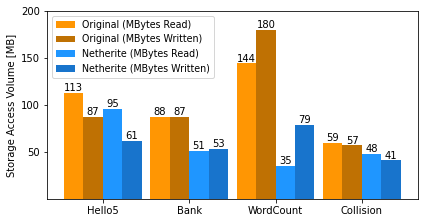

In [9]:
def plot_figure_storage(original_reads, original_writes, netherite_reads, netherite_writes, ylabel, N=4):
    
  ind = np.arange(4)  # the x locations for the groups
  width = 0.225       # the width of the bars

  fig, ax = plt.subplots(figsize=(6,3.2))
  rects1 = ax.bar(ind, original_reads, width, color=(1.0, 0.589256862745098, 0.0130736618971914))
  rects2 = ax.bar(ind + width, original_writes, width, color=(0.75* 1.0, 0.75*0.589256862745098, 0.75*0.0130736618971914))
  rects3 = ax.bar(ind + 2*width, netherite_reads, width, color=(1.3*24/256,1.3*116/256,1))
  rects4 = ax.bar(ind + 3*width, netherite_writes, width, color=(24/256,116/256,205/256))

  # add some text for labels, title and axes ticks
  ax.set_ylabel(ylabel)
  ax.set_xticks(ind + width*1.5)
  ax.set_xticklabels(( 'Hello5', 'Bank', 'WordCount', 'Collision'))
  ax.set_yticks([50, 100, 150, 200])

  ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), 
            ('Original (MBytes Read)', 'Original (MBytes Written)', 
             'Netherite (MBytes Read)', 'Netherite (MBytes Written)')
            ,prop={'size': 9.5})

  ax.text(0.5, 0.95, "", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='center')

  def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%.0f' % height,
                ha='center', va='bottom',fontsize = 10)

  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)
  autolabel(rects4)
  plt.tight_layout()
  plt.savefig("storage-size.pdf", format="pdf", dpi=300)
  plt.show()


# Metrics for Storage
storage_egress_azure = [113.09, 87.6, 144.1, 59.3]
storage_ingress_azure = [86.9, 86.9, 179.5, 56.9]

storage_egress_netherite = [93, 32.6, 18.7, 44.5]
storage_ingress_netherite = [59.5, 35.7, 56.3, 37.4] 

# Metrics for EventHub (Netherite only)
eh_ingress_netherite = [1.9, 17.5, 22.3, 3.5] 
eh_egree_netherite = [2.4, 18, 16.7, 3.5]

# totals 
original_reads = storage_egress_azure
original_writes = storage_ingress_azure
netherite_reads = list(map(sum, zip(storage_egress_netherite,eh_egree_netherite))) 
netherite_writes = list(map(sum, zip(storage_ingress_netherite,eh_ingress_netherite))) 

plot_figure_storage(original_reads, original_writes, netherite_reads, netherite_writes, "Storage Access Volume [MB]")
